### EX. NO. 1D FEATURE EXTRACTION / FEATURE SELECTION

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
diabetesData = pd.read_csv('diabetes.csv')
diabetesData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Q1) Perform feature selection using Pearson correlation coefficient.

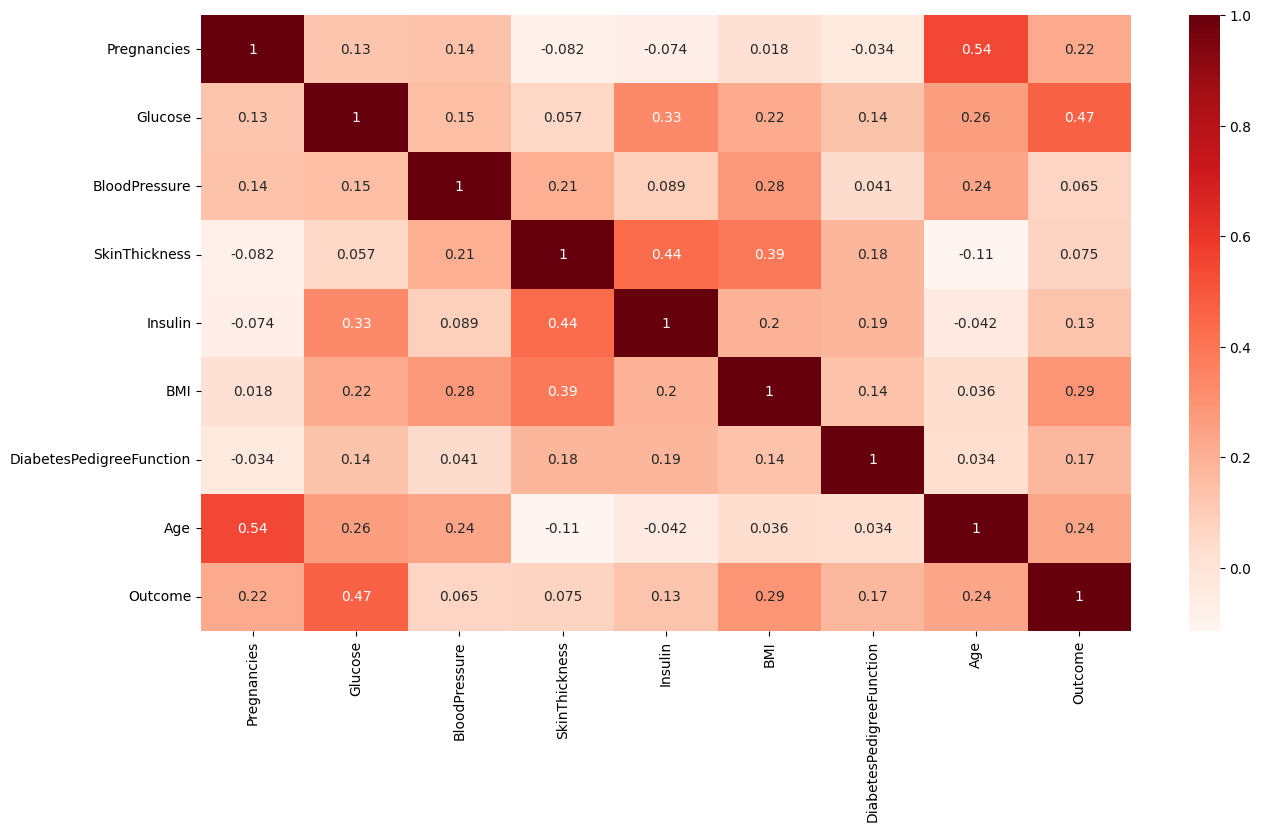

In [69]:
plt.figure(figsize=(15,8))
corr = diabetesData.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()


In [70]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [71]:
cor_target = abs(corr["Outcome"])

In [72]:
cor_target

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [73]:
relevant_features = cor_target[cor_target > 0.20]
relevant_features

Pregnancies    0.221898
Glucose        0.466581
BMI            0.292695
Age            0.238356
Outcome        1.000000
Name: Outcome, dtype: float64

In [74]:
diabetesData[["Pregnancies", "Glucose"]].corr()

,Pregnancies,Glucose
Pregnancies,1.000000,0.129459
Glucose,0.129459,1.000000


In [75]:
diabetesData[["Pregnancies", "Age"]].corr()
# Delete Age/ Pregnancy as they are correlated

,Pregnancies,Age
Pregnancies,1.000000,0.544341
Age,0.544341,1.000000


In [76]:
diabetesData[["Pregnancies", "BMI"]].corr()
# Can Delete both

,Pregnancies,BMI
Pregnancies,1.000000,0.017683
BMI,0.017683,1.000000


In [77]:
diabetesData[["Age", "Glucose"]].corr()
# Can delete both(Keep Glucose as its relation with outcome is high)

,Age,Glucose
Age,1.000000,0.263514
Glucose,0.263514,1.000000


In [78]:
diabetesData[["BMI", "Glucose"]].corr()
# Can delete Both

,BMI,Glucose
BMI,1.000000,0.221071
Glucose,0.221071,1.000000


In [79]:
diabetesData[["BMI", "Age"]].corr()
# Can delete both as cor < 0.5

,BMI,Age
BMI,1.000000,0.036242
Age,0.036242,1.000000


Final Features :
Age and Glucose as they are highly correlated with Outcome.

Q2) Perform feature selection using recursive feature elimination method.

In [80]:
#import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [81]:
diabetesData.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [82]:
diabetesData.shape

(768, 9)

In [83]:
X = diabetesData.values[:, 0:8]
Y = diabetesData.values[:, 8]
X.shape, Y.shape

((768, 8), (768,))

In [84]:
model = LogisticRegression(solver='lbfgs')
model

LogisticRegression()

In [85]:
rfe = RFE(estimator=model, n_features_to_select=3)
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [86]:
fit = rfe.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
fit.n_features_

3

In [88]:
fit.support_

array([ True, False, False, False, False,  True,  True, False])

In [89]:
fit.classes_

array([0., 1.])

In [90]:
fit.ranking_

array([1, 2, 4, 5, 6, 1, 1, 3])

In [91]:
cols = list(diabetesData.columns)
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [92]:
print("Columns that can be chosen according to RFE : ", end = " ")
fitcolumns = list(fit.support_)
for i in range(len(fitcolumns)):
  if fitcolumns[i] :
    print(cols[i], end = " ")

Columns that can be chosen according to RFE :  Pregnancies BMI DiabetesPedigreeFunction 

Final Features :
Pregnancies, BMI and DiabetesPedigreeFunction
-> according to RFE